#### Anime Rating Case Study

#### Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. As Data Scientist identify the important factors and building a predictive model to predict the rating on an anime.

#### Data Information

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- `title` - the title of anime
- `description` - the synopsis of the plot
- `mediaType` - format of publication
- `eps` - number of episodes (movies are considered 1 episode)
- `duration` - duration of an episode in minutes
- `ongoing` - whether it is ongoing
- `sznOfRelease` - the season of release (Winter, Spring, Fall)
- `years_running` - number of years the anime ran/is running
- `studio_primary` - primary studio of production
- `studios_colab` - whether there was a collaboration between studios to produce the anime
- `contentWarn` - whether anime has a content warning
- `watched` - number of users that completed it
- `watching` - number of users that are watching it
- `wantWatch` - number of users that want to watch it
- `dropped` - number of users that dropped it before completion
- `rating` - average user rating
- `votes` - number of votes that contribute to rating
- `tag_Based_on_a_Manga` - whether the anime is based on a manga
- `tag_Comedy` - whether the anime is of Comedy genre
- `tag_Action` - whether the anime is of Action genre
- `tag_Fantasy` - whether the anime is of Fantasy genre
- `tag_Sci_Fi` - whether the anime is of Sci-Fi genre
- `tag_Shounen` - whether the anime has a tag Shounen
- `tag_Original_Work` - whether the anime is an original work
- `tag_Non_Human_Protagonists` - whether the anime has any non-human protagonists
- `tag_Drama` - whether the anime is of Drama genre
- `tag_Adventure` - whether the anime is of Adventure genre
- `tag_Family_Friendly` - whether the anime is family-friendly
- `tag_Short_Episodes` - whether the anime has short episodes
- `tag_School_Life` - whether the anime is regarding school life
- `tag_Romance` - whether the anime is of Romance genre
- `tag_Shorts` - whether the anime has a tag Shorts
- `tag_Slice_of_Life` - whether the anime has a tag Slice of Life
- `tag_Seinen` - whether the anime has a tag Seinen
- `tag_Supernatural` - whether the anime has a tag Supernatural
- `tag_Magic` - whether the anime has a tag Magic
- `tag_Animal_Protagonists` - whether the anime has animal protagonists
- `tag_Ecchi` - whether the anime has a tag Ecchi
- `tag_Mecha` - whether the anime has a tag Mecha
- `tag_Based_on_a_Light_Novel` - whether the anime is based on a light novel
- `tag_CG_Animation` - whether the anime has a tag CG Animation
- `tag_Superpowers` - whether the anime has a tag Superpowers
- `tag_Others` - whether the anime has other tags
- `tag_is_missing` - whether tag is missing or not

#### Import necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv("data/13_anime_data.csv")

In [3]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 12101 rows and 44 columns.


In [4]:
# to view first 5 rows of the dataset
df.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# to view last 5 rows of the dataset
df.tail()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Princess Vanilla is a princess in a land of ic...,Movie,1,NaN,False,is_missing,0,TMS Entertainment,0,0,22.0,1,29,1,2.807,10,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12097,Hulaing Babies Petit,NaN,TV,12,5.0,False,Winter,0,Others,0,0,13.0,10,77,2,2.090,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12098,Marco & The Galaxy Dragon,NaN,OVA,1,NaN,False,is_missing,0,is_missing,0,0,17.0,0,65,0,2.543,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12099,Xing Chen Bian 2nd Season,Second season of Xing Chen Bian.,Web,3,24.0,True,is_missing,0,is_missing,0,0,40.5,31,22,0,3.941,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,Movie,1,20.0,False,is_missing,0,Shin-Ei Animation,0,0,15.0,1,19,1,2.925,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
# let's create a copy of the data to avoid any changes to original data
data = df.copy()

In [7]:
# checking for duplicate values in the data
data.duplicated().sum()

np.int64(0)

- There are no duplicate values in the data.

In [8]:
# checking the names of the columns in the data
print(data.columns)

Index(['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')


In [9]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

* Dependent variable is the rating of an anime, which if of *float* type.
* `title`, `description`, `mediaType`, `sznOfRelease`, `studio_primary` are of *object* type.
* `ongoing` column is of *bool* type.
* All other columns are numeric in nature.
* There are missing values in the `description` and `duration` columns.

**Let's check for missing values in the data.**

In [10]:
# checking for missing values in the data
data.isnull().sum().sort_values(ascending=False)

duration                      4636
description                   4468
tag_Seinen                       0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes               0
tag_School_Life                  0
tag_Romance                      0
tag_Shorts                       0
tag_Slice_of_Life                0
title                            0
tag_Original_Work                0
tag_Magic                        0
tag_Animal_Protagonists          0
tag_Ecchi                        0
tag_Mecha                        0
tag_Based_on_a_Light_Novel       0
tag_CG_Animation                 0
tag_Superpowers                  0
tag_Others                       0
tag_Supernatural                 0
tag_Shounen                      0
tag_Sci_Fi                       0
tag_Fantasy                      0
mediaType                        0
eps                              0
ongoing             

* `duration` column has 4636 missing values, and `description` column has 4468 missing values.
* No other column has missing values.

In [11]:
# Let's look at the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.

* Some anime even have a runtime of 1 minute.
* At least 75% of the anime have run for less than a year.
    - This may be because the listed anime has few episodes only.
* At least 75% of the anime have no content warnings.

* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

**Let's look at the non-numeric columns.**

In [12]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [13]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

mediaType
TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: count, dtype: int64
--------------------------------------------------
ongoing
False    11986
True       115
Name: count, dtype: int64
--------------------------------------------------
sznOfRelease
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: count, dtype: int64
--------------------------------------------------
studio_primary
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Anima

* Most of the anime in the data are either TV series or movies.
* Most of the anime in the data are not ongoing.
* The season of release is missing for most of the anime in the data.
* *Toei Animation* and *Sunrise* are the top two studios (excluding other studios and missing studios).

**We will drop the `title` and `description` columns before moving forward as they have a lot of text in them.**

In [14]:
data.drop(["title", "description"], axis=1, inplace=True)

#### We will drop the missing values in the dataset.

In [15]:
data.dropna(inplace=True)
data.shape

(7465, 42)

#### Let's visualize the data

#### Univariate Analysis

In [16]:
# Function to create a histogram and boxplot combined for visualization of numerical features
def histogram_boxplot(data, feature, figsize=(10, 5)):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,5))
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=True, ax=ax_hist2, color='skyblue')  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

#### `rating` Average User Rating

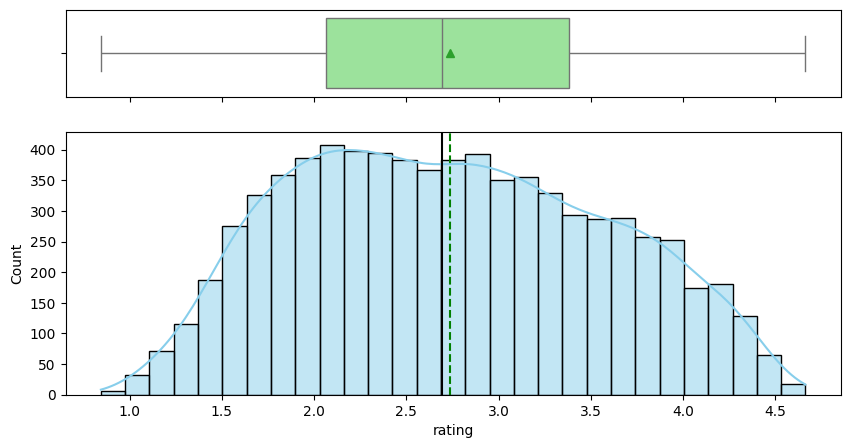

In [17]:
histogram_boxplot(data, "rating")

* The anime ratings are close to normally distributed.

#### `eps` number of episodes (movies are considered 1 episode)

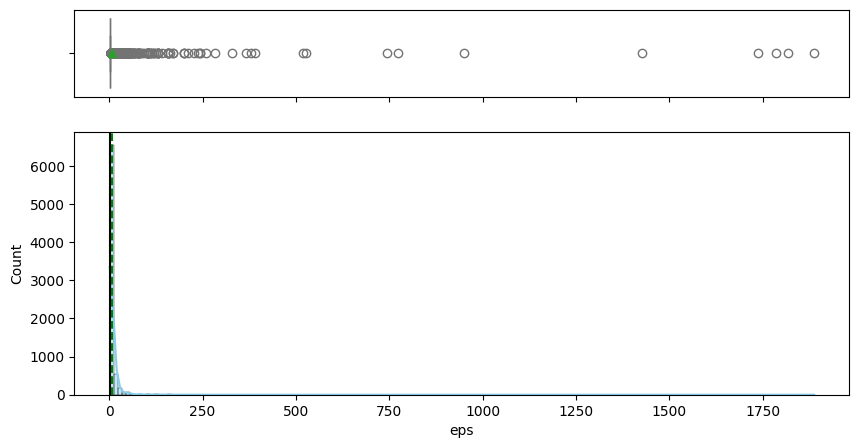

In [18]:
histogram_boxplot(data, "eps")

* The distribution is heavily right-skewed, as there are many anime movies in the data, and they are considered to be of only one episode (as per data description).

#### `duration` duration of an episode in minutes

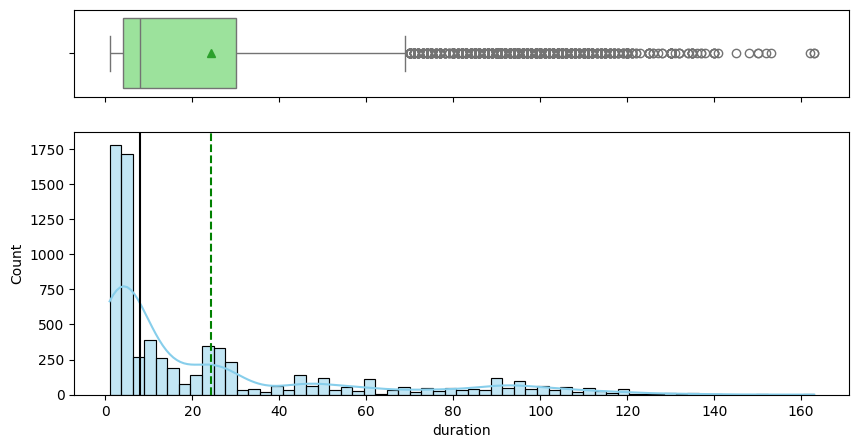

In [19]:
histogram_boxplot(data, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

#### `years_running` number of years the anime ran/is running

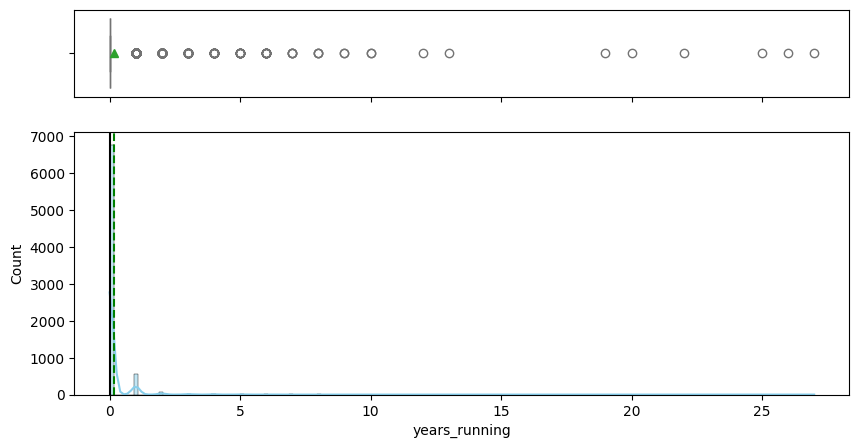

In [20]:
histogram_boxplot(data, "years_running")

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

#### `watched` number of users that completed it

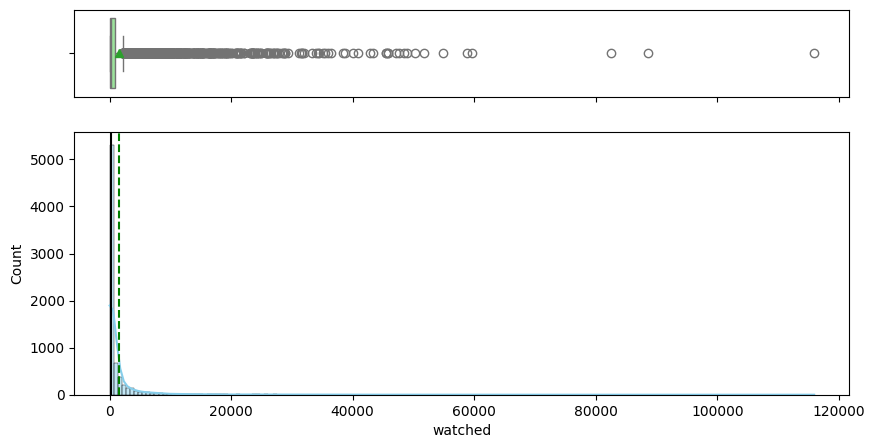

In [21]:
histogram_boxplot(data, "watched")

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

#### `watching` number of users that are watching it

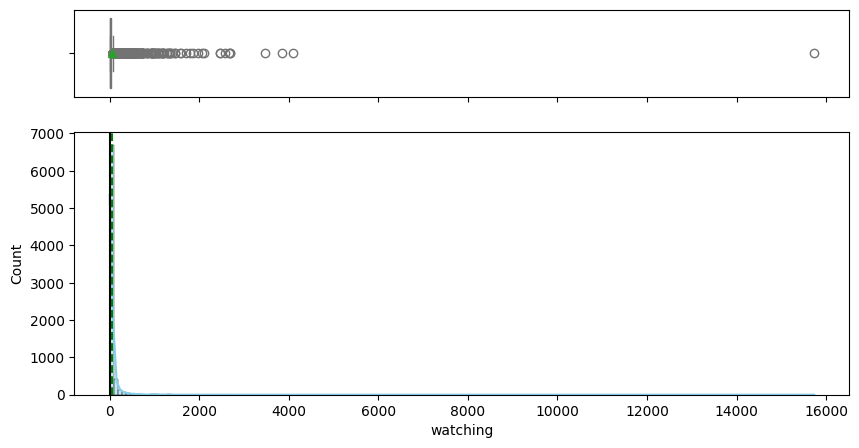

In [22]:
histogram_boxplot(data, "watching")

* The distribution is heavily right-skewed.

#### `wantWatch` number of users that want to watch it

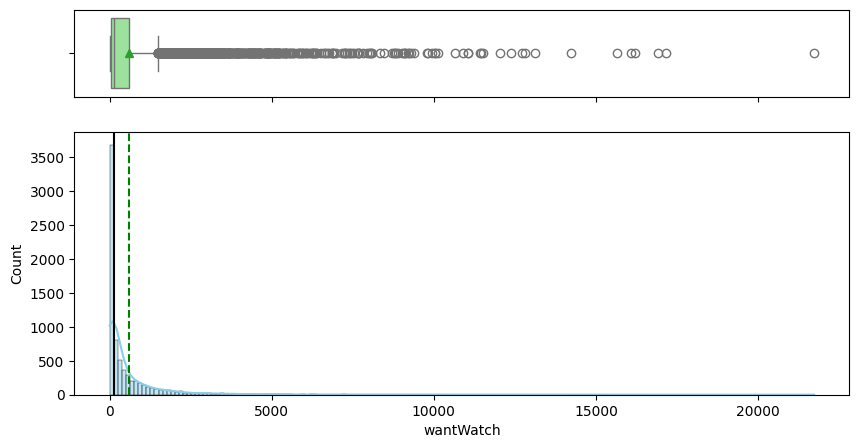

In [23]:
histogram_boxplot(data, "wantWatch")

* The distribution is heavily right-skewed.

#### `dropped` number of users that dropped it before completion

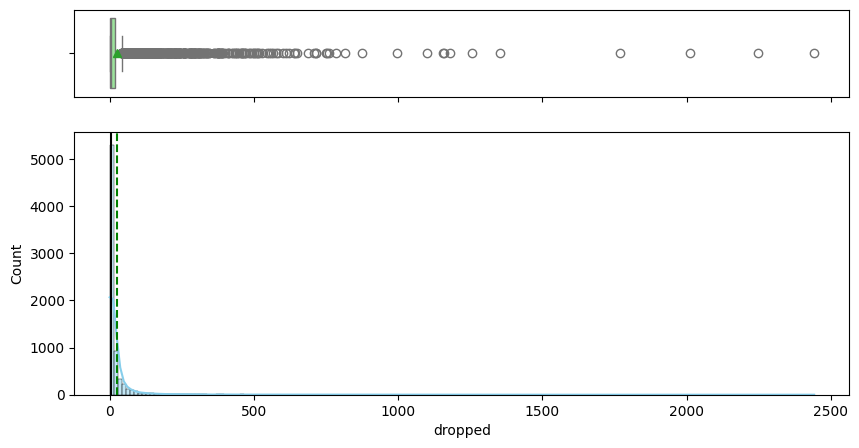

In [24]:
histogram_boxplot(data, "dropped")

* The distribution is heavily right-skewed.

#### `votes` number of votes that contribute to the rating

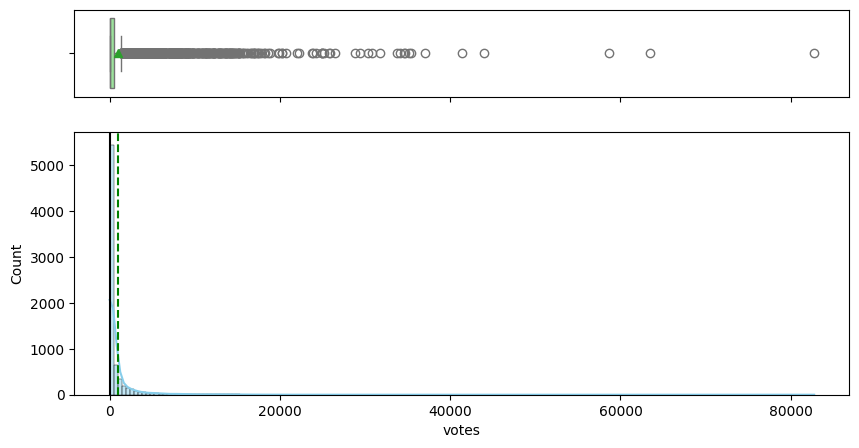

In [25]:
histogram_boxplot(data, "votes")

* The distribution is heavily right-skewed, and few shows have more than 5000 votes.

In [26]:
def plot_count_and_percentage(data, column, figsize=(12, 5)):
    """
    Plots two countplots side by side: one with count labels, one with percentage labels.
    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The column to plot.
        figsize (tuple): Figure size for the plots.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    categories = data[column].value_counts().index
    total = len(data)
    
    # Countplot with count labels
    ax1 = sns.countplot(data=data, x=column, order=categories, ax=axes[0])
    axes[0].set_title('Counts per ' + column)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
    for p in ax1.patches:
        count = int(p.get_height())
        ax1.annotate(str(count), (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black')
    
    # Countplot with percentage labels
    ax2 = sns.countplot(data=data, x=column, order=categories, ax=axes[1])
    axes[1].set_title('Percentage per ' + column)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentage')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
    for p in ax2.patches:
        percent = 100 * p.get_height() / total
        ax2.annotate(f'{percent:.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='blue')
    
    plt.tight_layout()
    plt.show()

#### `mediaType` format of publication

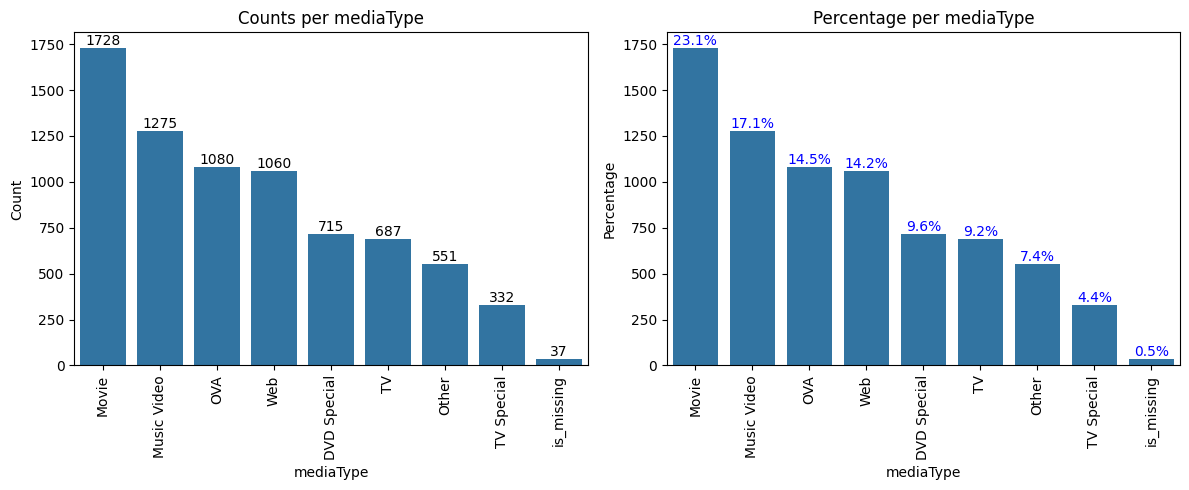

In [27]:
plot_count_and_percentage(data, "mediaType", figsize=(12, 5))

* Distribution of the media types has changed a lot after dropping the rows with missing values.
* Most of the anime now are movies or music videos.

#### `ongoing` whether it is ongoing

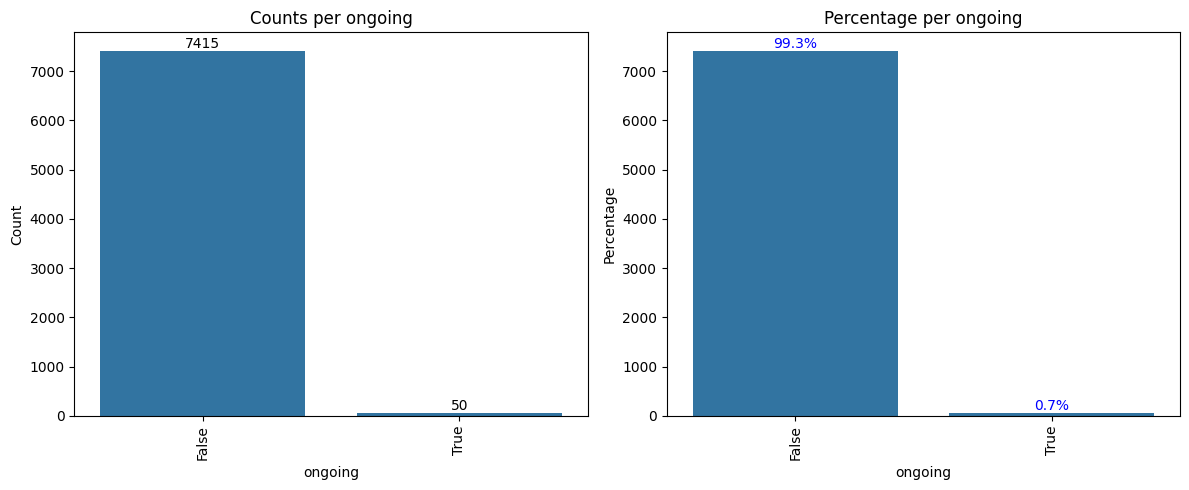

In [28]:
plot_count_and_percentage(data, "ongoing", figsize=(12, 5))

* Very few anime in the data are ongoing.

#### `sznOfRelease` the season of release (winter, spring, fall)

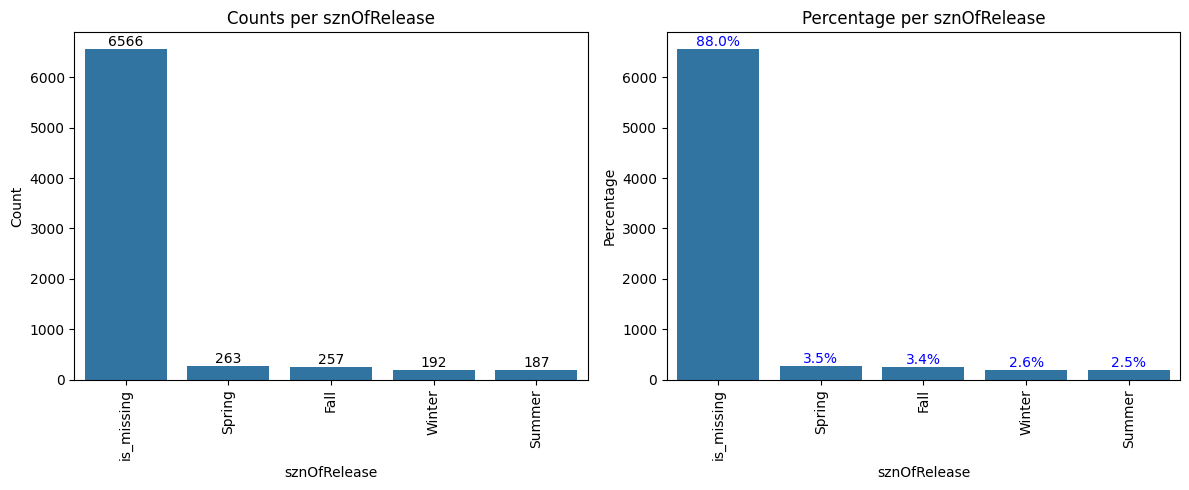

In [29]:
plot_count_and_percentage(data, "sznOfRelease", figsize=(12, 5))

* The season of release of anime is spread out across all seasons when the value is available.

#### `studio_primary` primary studio of production

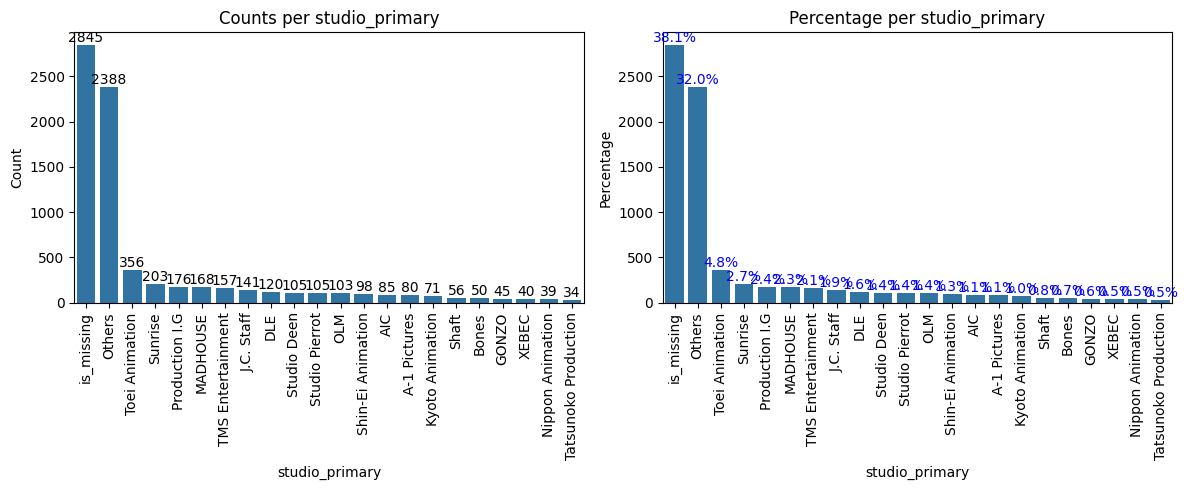

In [30]:
plot_count_and_percentage(data, "studio_primary", figsize=(12, 5))

* *Toei Animation* is the most common studio among the available studio names.

#### `studios_colab` whether there was a collaboration between studios to produce the anime

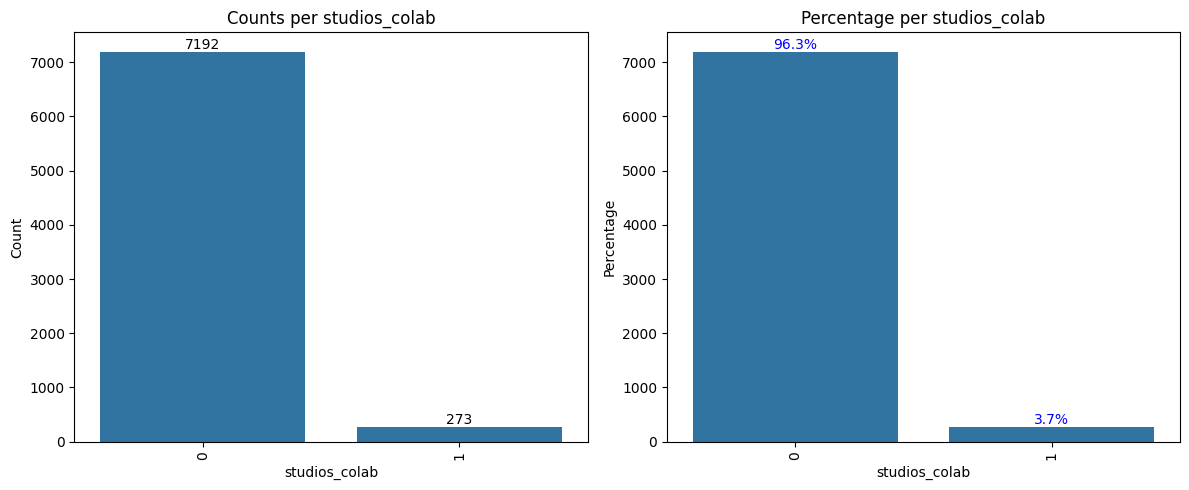

In [31]:
plot_count_and_percentage(data, "studios_colab", figsize=(12, 5))

- More than 95% of the anime in the data do not involve a collaboration between studios.

#### `contentWarn` whether anime has a content warning

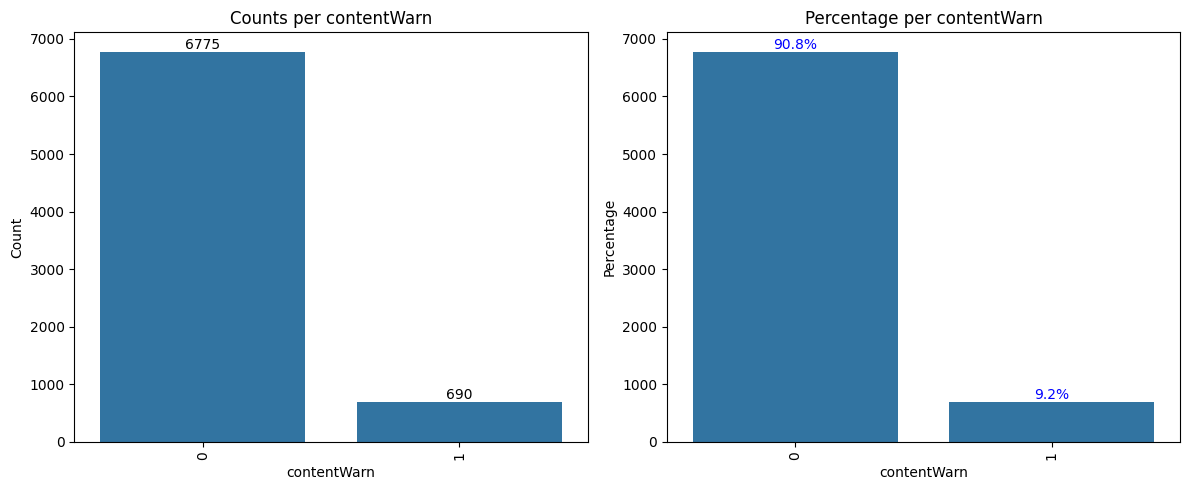

In [32]:
plot_count_and_percentage(data, "contentWarn", figsize=(12, 5))

- ~9% of the anime in the data have an associated content warning.

In [33]:
# creating a list of tag columns
tag_cols = [item for item in data.columns if "tag" in item]

# printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(data[column].value_counts())
    print("-" * 50)

tag_Based_on_a_Manga
0    5718
1    1747
Name: count, dtype: int64
--------------------------------------------------
tag_Comedy
0    5545
1    1920
Name: count, dtype: int64
--------------------------------------------------
tag_Action
0    6227
1    1238
Name: count, dtype: int64
--------------------------------------------------
tag_Fantasy
0    6342
1    1123
Name: count, dtype: int64
--------------------------------------------------
tag_Sci_Fi
0    6511
1     954
Name: count, dtype: int64
--------------------------------------------------
tag_Shounen
0    6625
1     840
Name: count, dtype: int64
--------------------------------------------------
tag_Original_Work
0    6548
1     917
Name: count, dtype: int64
--------------------------------------------------
tag_Non_Human_Protagonists
0    6553
1     912
Name: count, dtype: int64
--------------------------------------------------
tag_Drama
0    6896
1     569
Name: count, dtype: int64
---------------------------------------------

* There are 1747 anime that are based on manga.
* There are 1920 anime of the Comedy genre.
* There are 1079 anime of the Romance genre.

#### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7465 entries, 1 to 12100
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mediaType                   7465 non-null   object 
 1   eps                         7465 non-null   int64  
 2   duration                    7465 non-null   float64
 3   ongoing                     7465 non-null   bool   
 4   sznOfRelease                7465 non-null   object 
 5   years_running               7465 non-null   int64  
 6   studio_primary              7465 non-null   object 
 7   studios_colab               7465 non-null   int64  
 8   contentWarn                 7465 non-null   int64  
 9   watched                     7465 non-null   float64
 10  watching                    7465 non-null   int64  
 11  wantWatch                   7465 non-null   int64  
 12  dropped                     7465 non-null   int64  
 13  rating                      7465 non-

In [35]:
# creating a list of non-tag columns
num_cols = data.select_dtypes(include=np.number).columns

corr_cols = [item for item in num_cols if "tag" not in item]

print(corr_cols)

['eps', 'duration', 'years_running', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


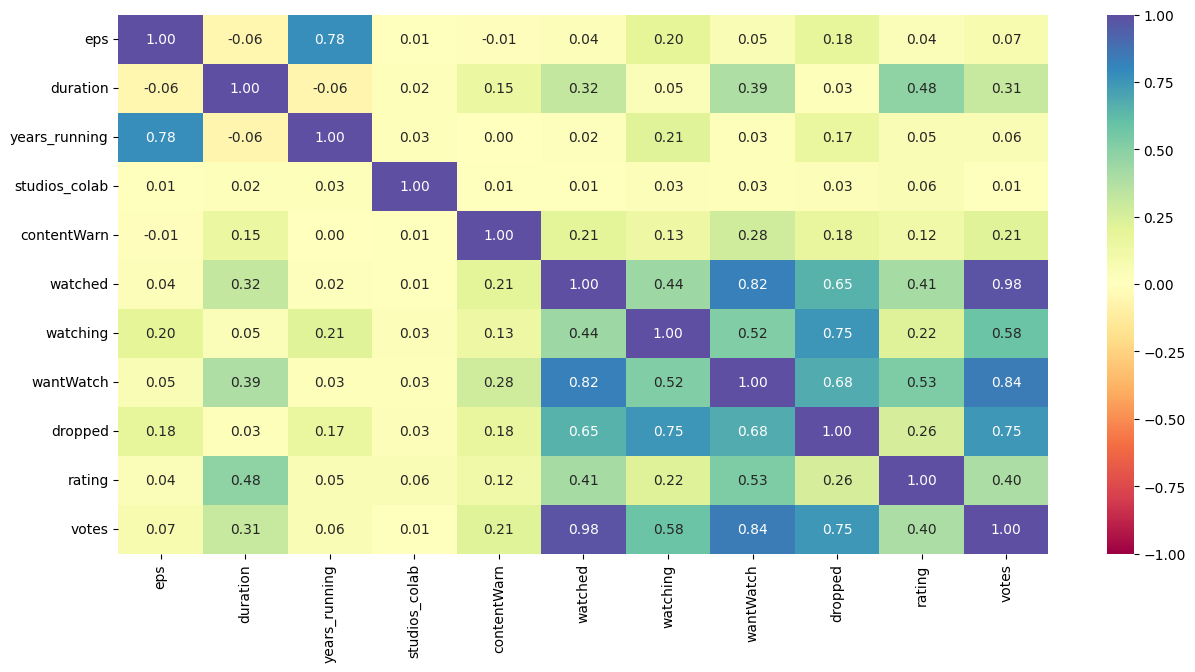

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `watched` and `wantWatch` columns are highly correlated.
* `watched` and `votes` columns are very highly correlated.
* `wantWatch` and `votes` columns are highly correlated.

**Checking the relation of different variables with rating**

**Note** - Double click on the below plot to zoom the image. Or you can open the below plot in a new tab for better visibilty

<Figure size 2000x500 with 0 Axes>

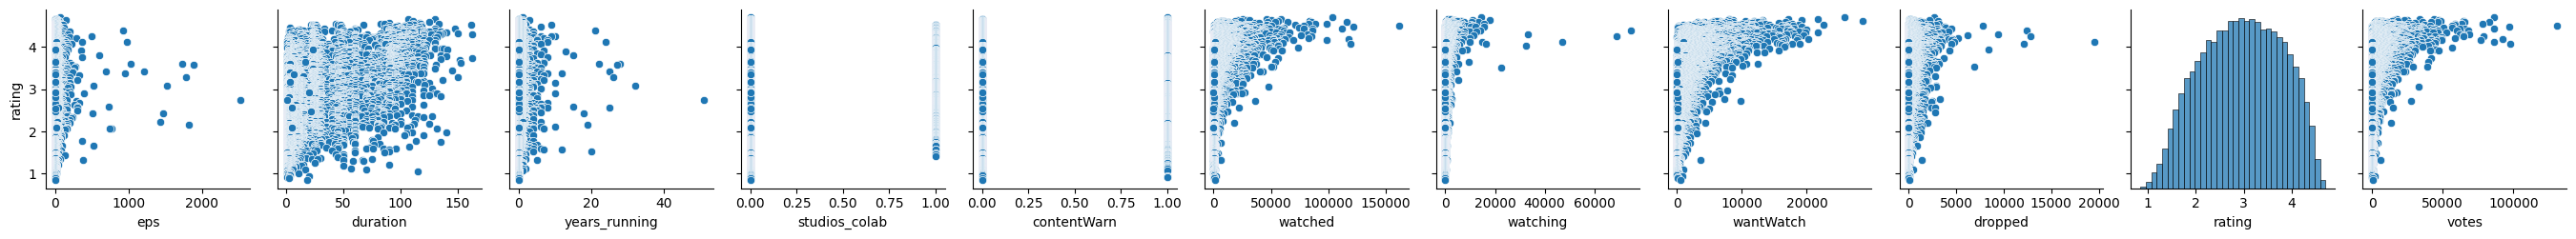

In [37]:
plt.figure(figsize=(20, 5))

sns.pairplot(df[corr_cols], y_vars="rating")
plt.show()

* Duration, ongoing, watched columns tend to show an increasing trend which means if there is an increase in the respective column there would be an increase in the rating. 
* Content warning tend to show the decreasing trend. 


#### Let's check the variation in `rating` with some of the categorical columns in our data

#### `mediaType` vs `rating`

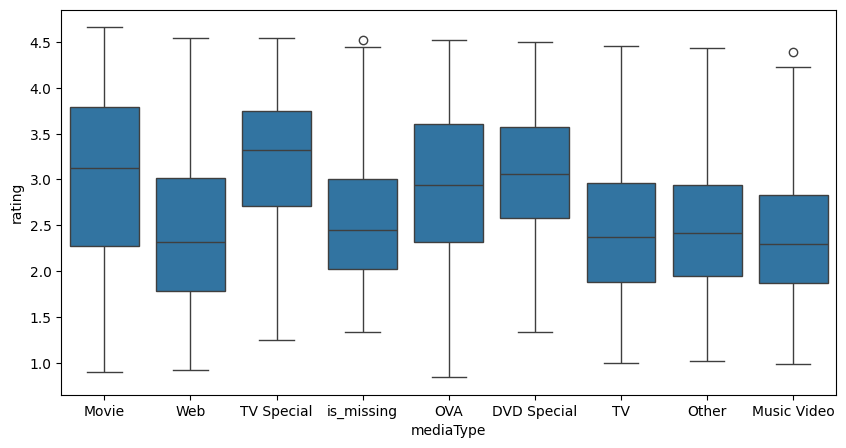

In [38]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=data)
plt.show()

* Anime available as TV series, web series, or music videos have a lower rating in general.

#### `sznOfRelease` vs `rating`

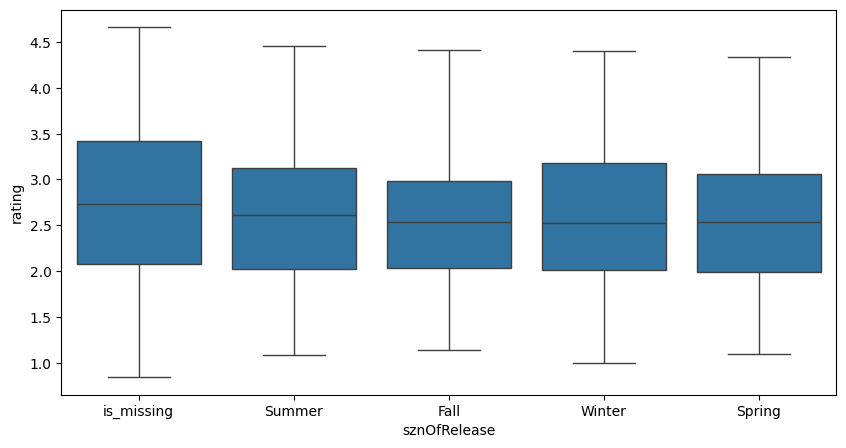

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=data)
plt.show()

* Anime ratings have a similar distribution across all the seasons of release.

#### `studio_primary` vs `rating`

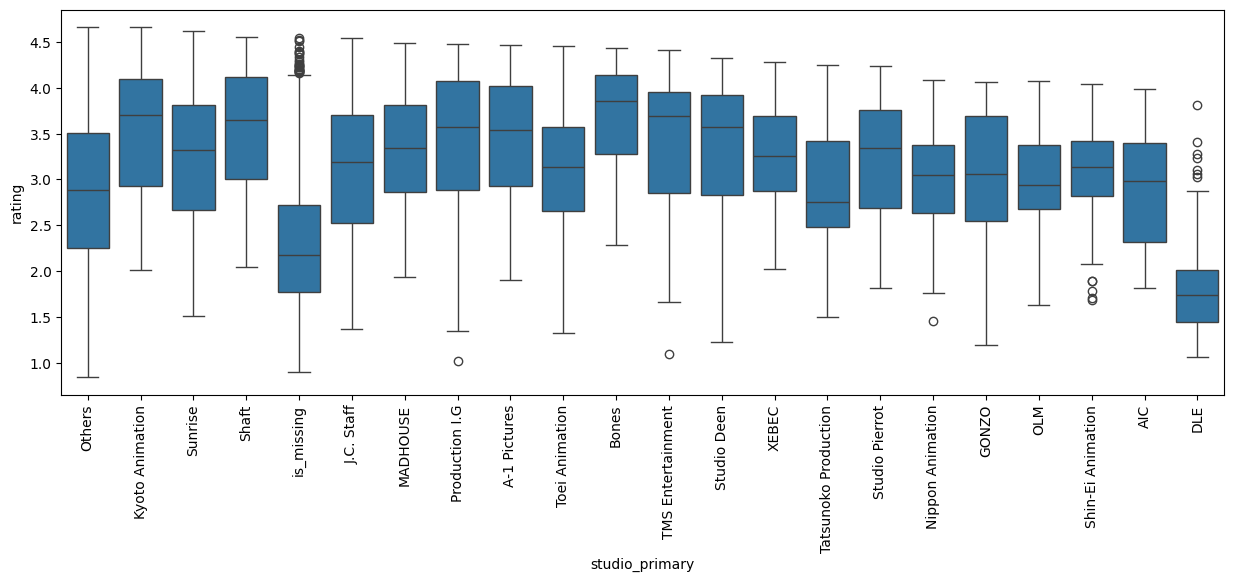

In [40]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=data)
plt.xticks(rotation=90)
plt.show()

* In general, the ratings are low for anime produced by *DLE* studios.
* Ratings are also low, in general, for anime produced by studios other than the ones in the data.

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`rating`) is of *float* type.
- `title`, `description`, `mediaType`, `sznOfRelease`, and `studio_primary` are of *object* type.
- `ongoing` column is of *bool* type.
- All other columns are numeric in nature.
- The `title` and `description` columns are dropped for modeling as they are highly textual in nature.
- There are no duplicate values in the data.
- There are missing values in the data. The rows with missing data have been dropped.


**Observations from EDA:**

- `rating`: The anime ratings are close to normally distributed, with a mean rating of 2.74. The rating increases with an increase in the number of people who have watched or want to watch the anime.
- `eps`: The distribution is heavily right-skewed as there are many anime movies in the data (at least 50%), and they are considered to be of only one episode as per data description. The number of episodes increases as the anime runs for more years.
- `duration`: The distribution is right-skewed with a median anime runtime of less than 10 minutes. With the increase in rating, the duration increases.
- `years_running`: The distribution is heavily right-skewed, and at least 75% of the anime have run for less than 1 year.
- `watched`: The distribution is heavily right-skewed, and most of the anime have less than 500 viewers. This attribute is highly correlated with the `wantWatch` and `votes` attributes.
- `watching`: The distribution is heavily right-skewed and highly correlated with the `dropped` attribute.
- `wantWatch`: The distribution is heavily right-skewed with a median value of 132 potential watchers.
- `dropped`: The distribution is heavily right-skewed with a drop of 25 viewers on average.
- `votes`: The distribution is heavily right-skewed, and few shows have more than 5000 votes.
- `mediaType`: 23% of the anime are published for TV, 17% as music videos, and 14% as web series. Anime available as TV series, web series, or music videos have a lower rating in general
- `ongoing`: Less than 1% of the anime in the data are ongoing.
- `sznOfRelease`: The season of release is missing for nearly 90% of the anime in the data, and is spread out almost evenly across all seasons when available. Anime ratings have a similar distribution across all the seasons of release.
- `studio_primary`: Nearly 40% of the anime in the data are produced by studios not listed in the data. Toei Animation is the most common studio among the available studio names. In general, the ratings are low for anime produced by DLE studios and studios other than the ones listed in the data.
- `studios_colab`: More than 95% of the anime in the data do not involve collaboration between studios.
- `contentWarn`: Less than 10% of the anime in the data have an associated content warning.
- `tag_<tag/genre>`: There are 1747 anime that are based on manga, 1920 of the Comedy genre, 1238 of the Action genre, 1079 anime of the Romance genre, and more.

### Model Building

#### Define independent and dependent variables

In [41]:
X = data.drop(["rating"], axis=1)
y = data["rating"]

#### Creating dummy variables

In [42]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True,)
X.head()

,eps,duration,ongoing,years_running,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,mediaType_is_missing,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,107.0,False,0,0,0,58831.0,1453,21733,124,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,130.0,False,0,0,1,45892.0,946,17148,132,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,1,111.0,False,0,0,0,8454.0,280,6624,150,6254,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
27,1,125.0,False,0,0,0,115949.0,589,12388,161,82752,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
31,1,117.0,False,0,0,0,35896.0,538,15651,130,26465,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [43]:
X.shape

(7465, 71)

#### Split the data into train and test

In [44]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5225
Number of rows in test data = 2240


#### Fitting a linear model

In [46]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function that will print out all the above metrics in one go.

In [47]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # R-squared - Proportion of the variance in the dependent variable that is predictable from the independent variables
    r2 = r2_score(target, pred)  # to compute R-squared

    # Adj. R-squared - Adjusted R-squared adjusts the statistic based on the number of predictors in the model
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    
    # RMSE - Root Mean Squared Error - Square root of the average of the squared errors between predicted and actual values
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    
    # MAE - Mean Absolute Error - Average of the absolute errors between predicted and actual values
    mae = mean_absolute_error(target, pred)  # to compute MAE
    
    # MAPE - Mean Absolute Percentage Error - How far off your predictions are, on average, in percentage terms
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [48]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.57729,0.467123,0.52152,0.514927,19.550725


In [49]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.569001,0.463416,0.515888,0.500034,19.386434


**Observations**

- The train and test $R^2$ are 0.522 and 0.516, indicating that the model explains 52.2% and 51.6% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.46

- MAPE of 19.4 on the test data means that we are able to predict within 19.4% of the anime rating.

- However, the overall performance is not so great.

## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*.

**Why should we do feature selection?**

- Reduces dimensionality
- Discards deceptive features (Deceptive features appear to aid learning on the training set, but impair generalization)
- Speeds training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables

In [50]:
# please uncomment and run the next line if mlxtend library is not previously installed
#!pip install mlxtend

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    1.5s finished

[2025-08-20 10:27:21] Features: 1/71 -- score: 0.2610893595879031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished

[2025-08-20 10:27:21] Features: 2/71 -- score: 0.3522663085348248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  69 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.2s finished

[2025-08-20 10:27:21] Features: 3/71 -- score: 0.4005056411016484[Parallel(

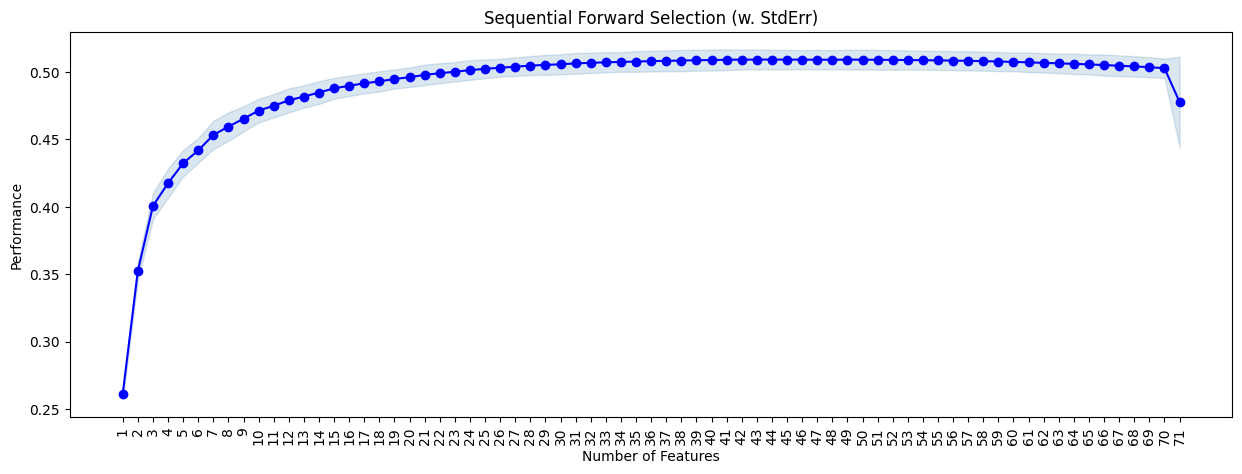

In [52]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

- We can see that performance increases till the 30th feature and then slowly becomes constant, and then drops sharply after the 70th feature is added.
- The decision to choose the *k_features* now depends on the adjusted $R^2$ vs the complexity of the model.
    - With 30 features, we are getting an adjusted $R^2$ of 0.506
    - With 48 features, we are getting an adjusted $R^2$ of 0.509.
    - With 71 features, we are getting an adjusted $R^2$ of 0.477.
- The increase in adjusted $R^2$ is not very significant as we are getting the same values with a less complex model.
- So we'll use 30 features only to build our model, but you can experiment by taking a different number.
- Number of features chosen will also depend on the business context and use case of the model.

In [53]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  71 out of  71 | elapsed:    0.2s finished

[2025-08-20 10:27:38] Features: 1/30 -- score: 0.2610893595879031[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished

[2025-08-20 10:27:38] Features: 2/30 -- score: 0.3522663085348248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  46 out of  69 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.2s finished

[2025-08-20 10:27:38] Features: 3/30 -- score: 0.4005056411016484[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jo

In [54]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 2, 3, 5, 6, 8, 10, 11, 13, 14, 16, 19, 21, 22, 25, 26, 27, 28, 33, 38, 40, 42, 49, 50, 52, 54, 59, 64, 68, 70]


In [55]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['duration', 'ongoing', 'years_running', 'contentWarn', 'watched',
       'wantWatch', 'votes', 'tag_Based_on_a_Manga', 'tag_Action',
       'tag_Fantasy', 'tag_Shounen', 'tag_Drama', 'tag_Family_Friendly',
       'tag_Short_Episodes', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Based_on_a_Light_Novel', 'mediaType_Movie',
       'mediaType_OVA', 'mediaType_TV', 'sznOfRelease_is_missing',
       'studio_primary_AIC', 'studio_primary_DLE', 'studio_primary_J.C. Staff',
       'studio_primary_Others', 'studio_primary_Studio Pierrot',
       'studio_primary_Toei Animation', 'studio_primary_is_missing'],
      dtype='object')

**Now we will fit an sklearn model using these features only.**

In [56]:
x_train_final = x_train[x_train.columns[feat_cols]]

In [57]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

In [58]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.582771,0.472809,0.512392,0.509575,19.791472


In [60]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.577022,0.470557,0.502142,0.495381,19.67366


- The performance looks slightly worse than the previous model.
- Let's compare the two models we built.

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.577290,0.582771
MAE,0.467123,0.472809
R-squared,0.521520,0.512392
Adj. R-squared,0.514927,0.509575
MAPE,19.550725,19.791472


In [62]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.569001,0.577022
MAE,0.463416,0.470557
R-squared,0.515888,0.502142
Adj. R-squared,0.500034,0.495381
MAPE,19.386434,19.673660


* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.
* **We will be moving forward with *lin_reg_model* as it shows better performance.**

#### Conclusions

- We have been able to build a predictive model that can be used by Streamist to predict the rating of an anime with an $R^2$ of 0.52 on the training set.


- Streamist can use this model to predict the anime ratings within a mean error of 0.46


- From the analysis, we found that the duration of each episode, and whether or not an anime is ongoing are some of the factors which tend to increase the rating of an anime. And factors like content warnings tend to decrease the rating of an anime.


- We can also explore improving the linear model by applying non-linear transformations to some of the attributes. This might help us better identify the patterns in the data to predict the anime ratings more accurately.